In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Метрики/М09/cohort_analysis_data - cohort_analysis_data.csv')

In [ ]:
df

,user_id,registration_date,activity_1_month,activity_3_month,activity_6_month,activity_12_month
0,1,2021-06-09,0,1,0,0
1,2,2021-08-09,0,0,0,0
2,3,2021-07-12,0,0,0,0
3,4,2022-04-13,0,0,0,0
4,5,2021-01-24,1,0,0,0
...,...,...,...,...,...,...
995,996,2021-10-30,1,0,0,0
996,997,2022-10-03,0,0,0,0
997,998,2022-12-25,1,1,0,0
998,999,2021-06-04,0,1,0,0


In [ ]:
df.columns

Index(['user_id', 'registration_date', 'activity_1_month', 'activity_3_month',
       'activity_6_month', 'activity_12_month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1000 non-null   int64 
 1   registration_date  1000 non-null   object
 2   activity_1_month   1000 non-null   int64 
 3   activity_3_month   1000 non-null   int64 
 4   activity_6_month   1000 non-null   int64 
 5   activity_12_month  1000 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


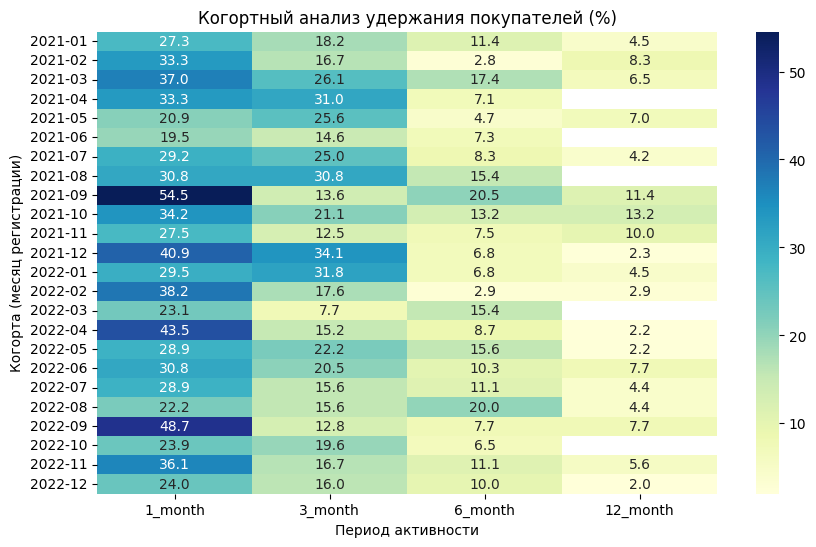

In [ ]:

# 1. Преобразуем дату регистрации в datetime
df['registration_date'] = pd.to_datetime(df['registration_date'])

# 2. Создаем когорту по месяцу регистрации
df['cohort_month'] = df['registration_date'].dt.to_period('M')

# 3. Создаем таблицу для когортного анализа
cohort_data = pd.DataFrame()

# Список периодов и соответствующих колонок активности
periods = {
    '1_month': 'activity_1_month',
    '3_month': 'activity_3_month',
    '6_month': 'activity_6_month',
    '12_month': 'activity_12_month'
}

# Для каждого периода считаем долю активных пользователей по когорте
for period_name, activity_col in periods.items():
    # Фильтруем пользователей с активностью > 0 в текущем периоде
    active_users = df[df[activity_col] > 0]

    # Группируем по когорте и считаем число уникальных user_id с активностью > 0
    cohort_counts = (
        active_users
        .groupby('cohort_month')['user_id']
        .nunique()
        .reset_index()
        .rename(columns={'user_id': period_name})
    )

    # Общее число пользователей в каждой когорте
    total_cohort_size = (
        df.groupby('cohort_month')['user_id']
        .nunique()
        .reset_index()
        .rename(columns={'user_id': 'total'})
    )

    # Объединяем данные по когорте
    merged = cohort_counts.merge(total_cohort_size, on='cohort_month')

    # Вычисляем процент удержания
    merged[period_name] = (merged[period_name] / merged['total']) * 100

    # Добавляем или обновляем таблицу cohort_data
    if cohort_data.empty:
        cohort_data = merged[['cohort_month', period_name]].set_index('cohort_month')
    else:
        cohort_data[period_name] = merged.set_index('cohort_month')[period_name]

# Упорядочим строки по дате когорты и преобразуем индекс в строку для отображения
cohort_data.index = cohort_data.index.astype(str)

# Визуализация тепловой картой
plt.figure(figsize=(10, 6))
sns.heatmap(cohort_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Когортный анализ удержания покупателей (%)')
plt.ylabel('Когорта (месяц регистрации)')
plt.xlabel('Период активности')
plt.show()

In [ ]:
df

,user_id,registration_date,activity_1_month,activity_3_month,activity_6_month,activity_12_month,cohort_month
0,1,2021-06-09,0,1,0,0,2021-06
1,2,2021-08-09,0,0,0,0,2021-08
2,3,2021-07-12,0,0,0,0,2021-07
3,4,2022-04-13,0,0,0,0,2022-04
4,5,2021-01-24,1,0,0,0,2021-01
...,...,...,...,...,...,...,...
995,996,2021-10-30,1,0,0,0,2021-10
996,997,2022-10-03,0,0,0,0,2022-10
997,998,2022-12-25,1,1,0,0,2022-12
998,999,2021-06-04,0,1,0,0,2021-06


#Отчет по когортному анализу удержания пользователей


**Введение**

Когортный анализ позволяет оценить, как пользователи взаимодействуют с продуктом или услугой в течение времени. В данном отчете представлены данные по удержанию пользователей за период с января 2021 года по декабрь 2022 года.

**Основные показатели**

1 месяц: Процент пользователей, которые остаются активными через 1 месяц после регистрации.

3 месяца: Процент пользователей, которые остаются активными через 3 месяца.

6 месяцев: Процент пользователей, которые остаются активными через 6 месяцев.

12 месяцев: Процент пользователей, которые остаются активными через 12 месяцев.

**Анализ данных**

Январь 2021: Удержание на уровне 27,3% через 1 месяц, 18,2% через 3 месяца, 11,4% через 6 месяцев и 4,5% через 12 месяцев.
Февраль 2021: Более высокий уровень удержания — 33,3% через 1 месяц, но снижение до 2,8% через 6 месяцев.
Март 2021: Значительное удержание — 37% через 1 месяц и 26,1% через 3 месяца.
Сентябрь 2021: Пик удержания — 54,5% через 1 месяц, что может быть связано с сезонными факторами или маркетинговыми акциями.
Декабрь 2022: Удержание на уровне 24% через 1 месяц, 16% через 3 месяца и 10% через 6 месяцев.

**Выводы**

Наилучшие показатели удержания наблюдаются в марте 2021 и сентябре 2021, что может указывать на успешные маркетинговые кампании или сезонные факторы.
В целом, удержание снижается с увеличением периода активности, что характерно для большинства продуктов.
Для улучшения удержания рекомендуется анализировать причины оттока пользователей и внедрять меры по их удержанию, такие как персонализация контента, программы лояльности и улучшение пользовательского опыта.

**Рекомендации**

Провести глубокий анализ причин оттока пользователей в периоды с низким удержанием.
Внедрить программы лояльности для удержания активных пользователей.
Оптимизировать пользовательский опыт на основе обратной связи.
